In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NumericalDescision:
    def __init__(self, N, M, A, B, p, T):
        self.N = N
        self.M = M
        self.A = A
        self.B = B
        self.p = p
        self.T = T
        
    def Ua(self, t):
        return t * np.cos(t)
    
    def Ub(self, t):
        return np.sin(t)

    def phi(self, x, t):
        return np.log(1 + t) * np.exp(-x + 1)

    def psi(self, x):
        return np.cos(x)

    def schema(self):    
        h = (self.B - self.A) / self.M
        tau = self.T / self.N
        q = (tau * self.p) / (h * h)
        u = []
        for i in range(self.N + 1):
            u.append([])
            for j in range(self.M + 1):
                u[i].append(0)
        for j in range(self.M + 1):
            u[0][j] = self.psi(self.A + j * h)
        alpha = [0]*(self.M + 1)
        betta = [0]*(self.M + 1)
        a, b, c, f = [0]*(self.M + 1), [0]*(self.M + 1), [0]*(self.M + 1), [0]*(self.M + 1)
        for n in range(self.N):
            for i in range(self.M + 1):
                a[i] = -q
                b[i] = 2 * q + 1
                c[i] = -q
                f[i] = u[n][i] + tau * self.phi(self.A + i * h, tau * n)
            b[0] = 1
            c[0] = 0 
            a[self.M] = 0
            b[self.M] = 1
            f[0] = self.Ua(tau * (n + 1))
            f[self.M] = self.Ub(tau * (n + 1))
        
            alpha[0] = -c[0] / b[0]
            betta[0] = f[0] / b[0]
            for k in range(1, self.M): 
                alpha[k] = -c[k]/(a[k] * alpha[k - 1] + b[k])
                betta[k] = (f[k] - a[k] * betta[k - 1])/(a[k] * alpha[k - 1] + b[k])
            u[n + 1][self.M] = (f[self.M] - a[self.M] * betta[self.M - 1])/(a[self.M] * alpha[self.M - 1] + b[self.M])
            for i in range(self.M - 1, -1, -1):
                u[n + 1][i] = alpha[i] * u[n + 1][i + 1] + betta[i]
        return h, u

    def get_axis(self, u, num, h):
        x = [0] * (self.M + 1)
        y = [0] * (self.M + 1)
        for m in range(self.M + 1):
            x[m] = self.A + (m) * h
            y[m] = u[num][m]
        return x, y

    def draw_graphic(self, h, u, ax1, ax2, ax3, ax4):
        number_arr = [0, int(self.N / 4), int(3 * self.N / 4), -1]
        
        x11, y11 = self.get_axis(u, number_arr[0], h)
        x12, y12 = self.get_axis(u, number_arr[1], h)
        x13, y13 = self.get_axis(u, number_arr[2], h)
        x14, y14 = self.get_axis(u, number_arr[3], h)
        
        ax1.plot(x11, y11)
        ax1.legend(labels=[f'M={40}, N=40', 'M=40, N=120', 'M=120, N=120', 'M=120, N=40'])
        ax1.grid(True)
        ax1.axis([-1.7, 1.6, -0.1, 1.6])
        
        ax2.plot(x12, y12)
        ax2.axis([-1.7, 1.6, -0.1, 1.6])
        ax2.legend(labels=['M=40, N=40', 'M=40, N=120', 'M=120, N=120', 'M=120, N=40'])
        ax2.grid(True)
        
        ax3.plot(x13, y13)
        ax3.axis([-1.7, 1.6, -0.1, 1.6])
        ax3.legend(labels=['M=40, N=40', 'M=40, N=120', 'M=120, N=120', 'M=120, N=40'])
        ax3.grid(True)
        ax3.axis([-1.7, 1.6, -0.1, 1.6])
        
        ax4.plot(x14, y14)
        ax4.axis([-1.7, 1.6, -0.1, 1.6])
        ax4.legend(labels=['M=40, N=40', 'M=40, N=120', 'M=120, N=120', 'M=120, N=40'])
        ax4.grid(True)
        ax4.axis([-1.7, 1.6, -0.1, 1.6])
        

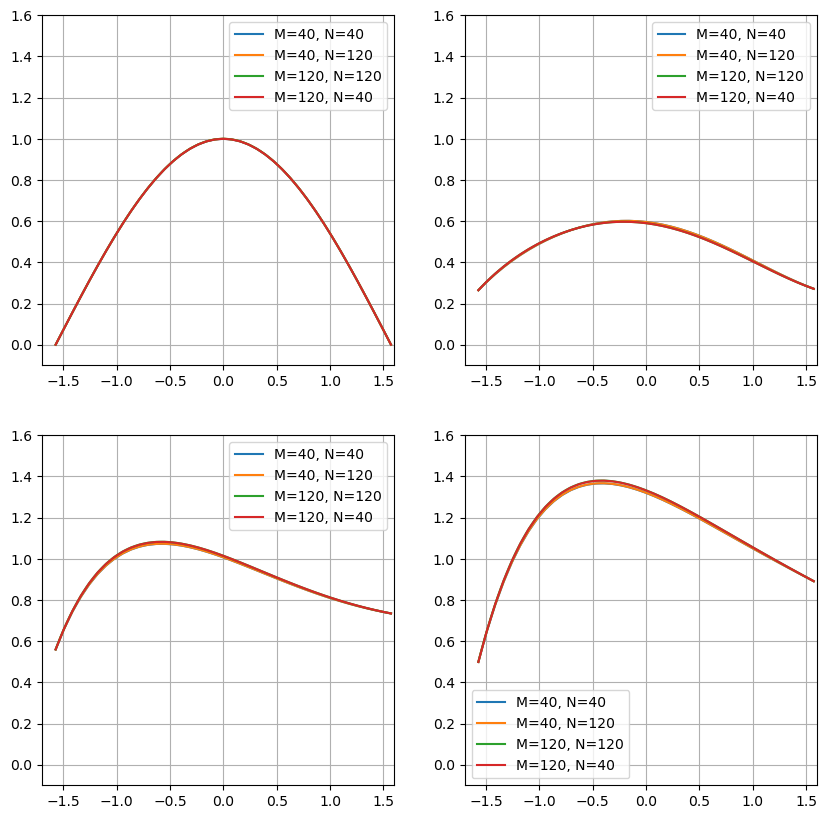

In [3]:
A = - np.pi / 2
B = np.pi / 2
p = 3
T = 1.1

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
ax1, ax2, ax3, ax4 = ax.flatten()


class_exemplar = NumericalDescision(40, 40, A, B, p, T)
h, vec = class_exemplar.schema()
class_exemplar.draw_graphic(h, vec, ax1, ax2, ax3, ax4)

class_exemplar1 = NumericalDescision(40, 120, A, B, p, T)
class_exemplar1 = NumericalDescision(40, 120, A, B, p, T)
h1, vec1 = class_exemplar1.schema()
class_exemplar1.draw_graphic(h1, vec1, ax1, ax2, ax3, ax4)

class_exemplar2 = NumericalDescision(120, 120, A, B, p, T)
class_exemplar2 = NumericalDescision(120, 120, A, B, p, T)
h2, vec2 = class_exemplar2.schema()
class_exemplar2.draw_graphic(h2, vec2, ax1, ax2, ax3, ax4)

class_exemplar3 = NumericalDescision(120, 40, A, B, p, T)
class_exemplar3 = NumericalDescision(120, 40, A, B, p, T)
h3, vec3 = class_exemplar3.schema()
class_exemplar3.draw_graphic(h3, vec3, ax1, ax2, ax3, ax4)